In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import os

data_dir = '/Users/athulapudhiyidath/Dropbox/Experiments/tesser_successor/Data/'
behavior_dir = os.path.join(data_dir, 'behavior') 

In [6]:
#################################
#INDUCTIVE GENERALIZATION BIAS
#################################

induct_bias = pd.read_csv(behavior_dir + '/' + 'Induct_Results_Bias_Overall_scan.txt', sep='\t')
induct_bias_df = pd.DataFrame(induct_bias)
#print(induct_bias_df)

#now convert wide to long to make bar plots
induct_bias_perf_long_df = pd.melt(induct_bias_df, value_vars=['Prim_Bias', 'Bound1_Bias', 'Bound2_Bias'], var_name='QuestType',value_name='Bias')
#print(induct_bias_perf_long_df)

########################
#INDUCTIVE GENERALIZATION RT
########################
induct_rt = pd.read_csv(behavior_dir + '/' + 'Induct_Results_RT_Overall_scan.txt', sep='\t')
induct_rt_df = pd.DataFrame(induct_rt)
induct_rt_df_long = pd.melt(induct_rt_df, id_vars = ['SUBJECT'], value_vars=['Prim_Corr_RT', 'Prim_Incorr_RT', 'Bound1_Corr_RT', 'Bound1_Incorr_RT', 'Bound2_Corr_RT', 'Bound2_Incorr_RT'], var_name='BiasType', value_name='RT')
new = induct_rt_df_long["BiasType"].str.split("_", n = 1, expand = True) 

# making separate first name column from new data frame 
induct_rt_df_long["QuestType"]= new[0] 
  
# making separate last name column from new data frame 
induct_rt_df_long["Accuracy"]= new[1]

induct_rt_df_long.RT = induct_rt_df_long.RT.astype(float)

In [7]:
induct_rt_df_long

,SUBJECT,BiasType,RT,QuestType,Accuracy
0,100,Prim_Corr_RT,3.347052,Prim,Corr_RT
1,101,Prim_Corr_RT,3.479156,Prim,Corr_RT
2,102,Prim_Corr_RT,2.707283,Prim,Corr_RT
3,103,Prim_Corr_RT,3.484031,Prim,Corr_RT
4,104,Prim_Corr_RT,2.199021,Prim,Corr_RT
...,...,...,...,...,...
217,133,Bound2_Incorr_RT,2.586076,Bound2,Incorr_RT
218,135,Bound2_Incorr_RT,3.338403,Bound2,Incorr_RT
219,136,Bound2_Incorr_RT,3.348357,Bound2,Incorr_RT
220,137,Bound2_Incorr_RT,NaN,Bound2,Incorr_RT


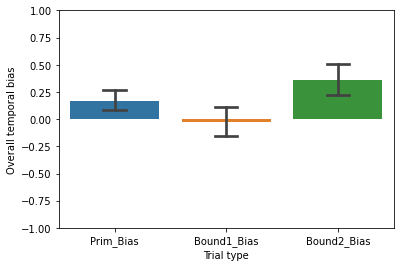

In [8]:
#plotting the bias performance in the inductive generalization task  
ax = sns.barplot(x="QuestType", y="Bias", data=induct_bias_perf_long_df, capsize=.2)
ax.set_ylabel('Overall temporal bias')
ax.set_ylim(-1, 1)
ax.set_xlabel('Trial type')
plt.savefig('TesserScan_QuestType_Bias.png', dpi = 300)
plt.savefig('TesserScan_QuestType_Bias.pdf', transparent=True)

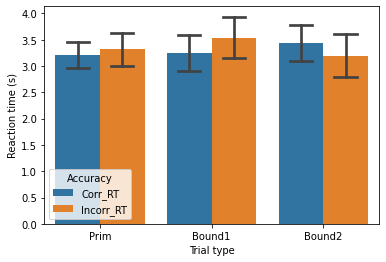

In [9]:
#plotting the RT for temporally congruent responses in the inductive generalization task  
ax = sns.barplot(x="QuestType", y="RT", hue="Accuracy", data=induct_rt_df_long, capsize=.2)
ax.set_ylabel('Reaction time (s)')
ax.set_xlabel('Trial type')
plt.savefig('TesserScan_QuestType_CorrInCorr_RT.png', dpi = 300)
plt.savefig('TesserScan_QuestType_CorrInCorr_RT.pdf', transparent=True)

In [11]:
########################
#PARSING
########################

parsing = pd.read_csv(behavior_dir + '/' + 'Parse_OverWalks_Results_Overall_scan.txt', sep='\t') 
parsing_df = pd.DataFrame(parsing)
print(parsing_df) #this dataframe is currently in long format, to use searborn barplot, need to convert to long

bound_parse = parsing_df['Bound_Prop']
other_parse = parsing_df['Other_Prop']
parse_diff = parsing_df['Parse_Diff']

#first extract relevant columsn from parsing 
parsing_relev_df = parsing_df[['Bound_Prop', 'Other_Prop', 'Parse_Diff']].copy()
#print(parsing_relev)

#now convert wide to long
parsing_relev_long_df = pd.melt(parsing_relev_df, value_vars=['Bound_Prop', 'Other_Prop'], var_name='parse_type',value_name='mean')
#print(parsing_relev_long_df)

    SUBJECT  Rand_Corr  Rand_Incorr  Ham_Corr  Ham_Incorr  Bound_Prop  \
0       100   0.426667     0.417476  0.345833    0.297917    0.386250   
1       101   0.253521     0.087719  0.263889    0.159722    0.258705   
2       102   0.115942     0.027451  0.744589    0.051587    0.430265   
3       103   0.393939     0.436364  0.270833    0.388194    0.332386   
4       104   0.085714     0.145729  0.296296    0.098765    0.191005   
5       105   0.152778     0.111111  0.152778    0.078704    0.152778   
6       106   0.759494     0.713080  0.648148    0.564815    0.703821   
7       106   0.439394     0.288372  0.312500    0.276389    0.375947   
8       108   0.250000     0.070485  0.370370    0.074074    0.310185   
9       109   0.364865     0.276316  0.237500    0.263889    0.301182   
10      110   0.151899     0.196507  0.150000    0.131250    0.150949   
11      111   0.117647     0.196581  0.257576    0.209957    0.187611   
12      112   0.194030     0.182609  0.194805    0.

In [12]:
parsing_df

,SUBJECT,Rand_Corr,Rand_Incorr,Ham_Corr,Ham_Incorr,Bound_Prop,Other_Prop,Parse_Diff
0,100,0.426667,0.417476,0.345833,0.297917,0.386250,0.357696,0.028554
1,101,0.253521,0.087719,0.263889,0.159722,0.258705,0.123721,0.134984
2,102,0.115942,0.027451,0.744589,0.051587,0.430265,0.039519,0.390746
3,103,0.393939,0.436364,0.270833,0.388194,0.332386,0.412279,-0.079893
4,104,0.085714,0.145729,0.296296,0.098765,0.191005,0.122247,0.068758
5,105,0.152778,0.111111,0.152778,0.078704,0.152778,0.094907,0.057870
6,106,0.759494,0.713080,0.648148,0.564815,0.703821,0.638948,0.064873
7,106,0.439394,0.288372,0.312500,0.276389,0.375947,0.282380,0.093566
8,108,0.250000,0.070485,0.370370,0.074074,0.310185,0.072279,0.237906
9,109,0.364865,0.276316,0.237500,0.263889,0.301182,0.270102,0.031080


Text(0.5, 0, 'parse type')

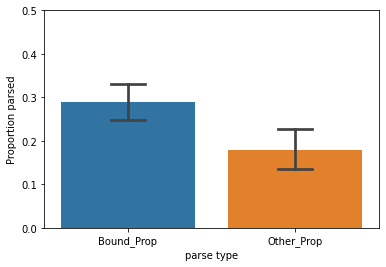

In [13]:
#plotting the mean RT in the orientation detection cover task 
ax = sns.barplot(x="parse_type", y="mean", data=parsing_relev_long_df, capsize=.2)
ax.set_ylabel('Proportion parsed')
ax.set_ylim(0, 0.5)
ax.set_xlabel('parse type')
#plt.savefig('TesserScan_ParseType.png', dpi = 300)
#plt.savefig('TesserScan_ParseType.pdf', transparent=True)

In [9]:
########################
#GROUPING PERFORMANCE
########################
within_across_dist = pd.read_csv('TesserScan_grouping_perf.csv', sep=",")
#print(within_across_dist)

within_across_dist_long = pd.melt(within_across_dist, value_vars=['within_dist', 'across_dist'], var_name='dist_type',value_name='mean')


In [10]:
within_across_dist

,SUBJECT,within_dist,across_dist
0,100,6.389585,6.331571
1,101,3.237940,7.474054
2,102,1.890761,13.262016
3,103,5.854042,6.554370
4,104,5.999613,5.851717
5,105,5.419942,5.216478
6,106,5.020634,9.018935
7,107,6.759719,8.261046
8,108,3.562085,7.125414
9,109,5.820866,6.503169


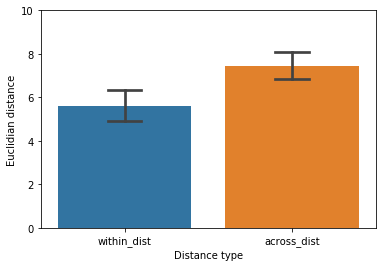

In [14]:
#plotting the grouping for primary vs. boundary items in grouping task 
ax = sns.barplot(x="dist_type", y="mean", data=within_across_dist_long, capsize=.2)
ax.set_ylabel('Euclidian distance')
ax.set_ylim(0, 10)
ax.set_xlabel('Distance type')
plt.savefig('TesserScan_DistType.png', dpi = 300)
plt.savefig('TesserScan_DistType.pdf', transparent=True)

/Users/athula/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


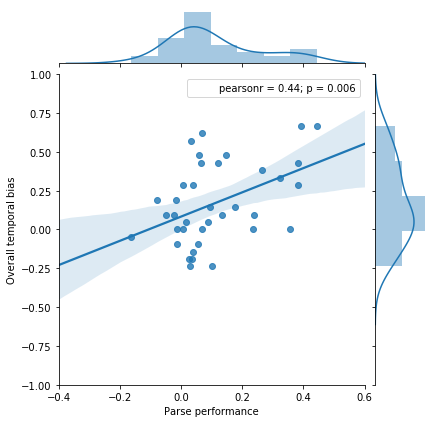

In [12]:
i = sns.jointplot(parsing_df['Parse_Diff'], induct_bias_df['Overall_Bias'], kind='reg');
i = i.annotate(stats.pearsonr)
plt.xlabel('Parse performance')
plt.xlim(-0.4, 0.6)
plt.ylabel('Overall temporal bias')
plt.ylim(-1, 1)
plt.show()
i.savefig('TesserScan_parse_overallbias.png', dpi = 300)
i.savefig('TesserScan_parse_overallbias.pdf', transparent=True)

/Users/athula/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


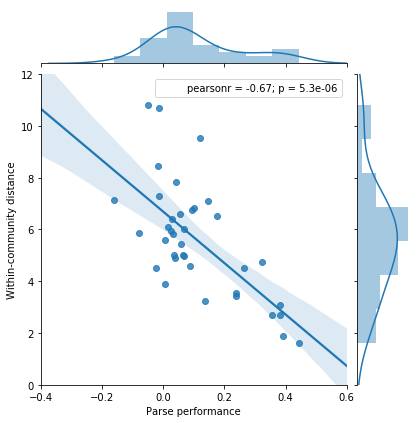

In [13]:
i = sns.jointplot(parsing_df['Parse_Diff'], within_across_dist['within_dist'], kind='reg');
i = i.annotate(stats.pearsonr)
plt.xlabel('Parse performance')
plt.xlim(-0.4, 0.6)
plt.ylabel('Within-community distance')
plt.ylim(0, 12)
plt.show()
i.savefig('TesserScan_parse_withindist.png', dpi = 300)
i.savefig('TesserScan_parse_withindist.pdf', transparent=True)